Purpose:

Create a discrete grid of point charges and calculate contributions on "continuous" grid inbetween".

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [14]:
# Create grid of sources
xs = jnp.linspace(-1, 1, 100)
ys = jnp.linspace(-1, 1, 100)

xx, yy = jnp.meshgrid(xs, ys)

# List of charge strengths
# qq = xx * 0 + 1 + jnp.identity(10)
qq = xx * 0 + 1

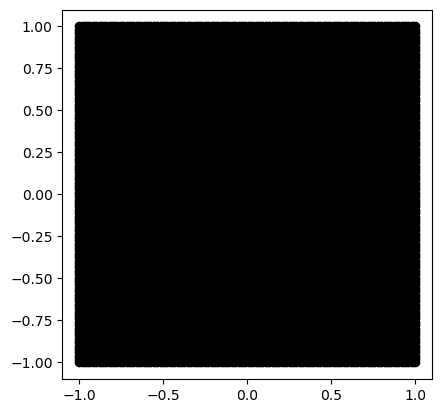

In [15]:
fig1, ax1 = plt.subplots()

ax1.plot(xx, yy, marker="o", color='k', linestyle='none')
ax1.set_aspect('equal')

In [16]:
@jax.jit
def potential(x, y, x0, y0, q):
    a=0.01
    return q * jnp.exp(-((x-x0) ** 2 + (y-y0) ** 2)/a)

In [17]:
# Calculate potential inbetween points
xc = jnp.linspace(-1, 1, 1000)
yc = jnp.linspace(-1, 1, 1000)

xxc, yyc = jnp.meshgrid(xc, yc, indexing='ij')
zzc = xxc * 0

In [18]:
# Vectorize over new xy space
v_vecxy = jax.vmap(potential, in_axes=(0, 0, None, None, None))

In [19]:
# Vectorize over source space
v_vecq = jax.vmap(v_vecxy, in_axes=(None, None, 0, 0, 0))

In [20]:
result = v_vecq(xxc.flatten(), yyc.flatten(), xx.flatten(), yy.flatten(), qq.flatten())

2024-07-10 15:42:58.915185: W external/xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below -31.12GiB (-33417794563 bytes) by rematerialization; only reduced to 37.25GiB (40000000000 bytes), down from 37.25GiB (40000000000 bytes) originally
2024-07-10 15:43:08.942562: W external/xla/xla/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 37.25GiB (rounded to 40000000000)requested by op 
2024-07-10 15:43:08.942721: W external/xla/xla/tsl/framework/bfc_allocator.cc:494] *********___________________________________________________________________________________________
E0710 15:43:08.942746    1105 pjrt_stream_executor_client.cc:2985] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 40000000000 bytes.


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 40000000000 bytes.

In [9]:
result_sum = jnp.sum(result, axis=0).reshape(len(xc), len(yc))

In [10]:
jnp.shape(result_sum)

(1000, 1000)

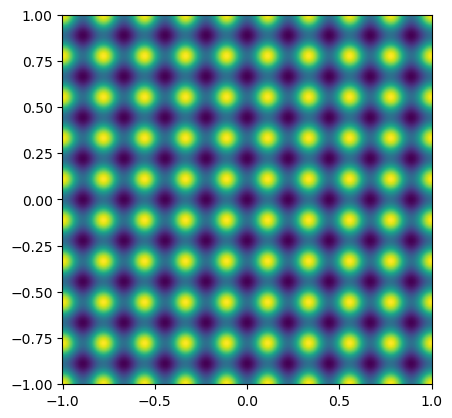

In [11]:
figt, axt = plt.subplots()

axt.pcolormesh(xxc, yyc, result_sum)
axt.set_aspect('equal')

In [12]:
# For all points in the
for (x, y, q) in zip(xx.flatten(), yy.flatten(), qq.flatten()):
    zzc += potential(xxc, yyc, x, y, q)

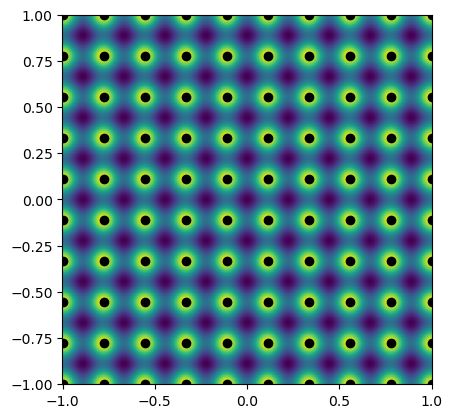

In [13]:
fig2, ax2 = plt.subplots()

ax2.pcolormesh(xxc, yyc, zzc)
ax2.plot(xx, yy, marker="o", color='k', linestyle='none')
ax2.set_aspect('equal')
#ax2.set_xlim(-1, 1)
#ax2.set_ylim(-1, 1)